Esse notebook vai analisar um base de dados de projetos de sites . O objetivo éé praticar a classificação com um modelo não linear.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
# adiquirindo os dados
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)



# mudando a nomenclatura das colunas e trocando alguns valores
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
 }

dados = dados.rename(columns = a_renomear)
print("dados:")
print(dados.head())

trocar = {
    1:0,
    0:1
}

dados['finalizado'] = dados.nao_finalizado.map(trocar) # isso vai criar uma nova coluna
print(dados.head())

dados:
   nao_finalizado  horas_esperadas  preco
0               1               26    192
1               1               88   9015
2               1               89   2577
3               1               42    275
4               1               39    170
   nao_finalizado  horas_esperadas  preco  finalizado
0               1               26    192           0
1               1               88   9015           0
2               1               89   2577           0
3               1               42    275           0
4               1               39    170           0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


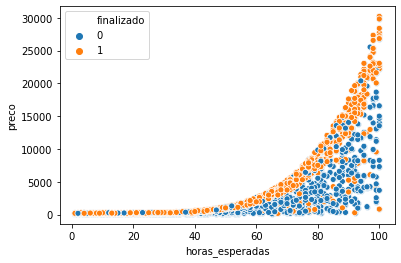

In [2]:
# plotando alguns valores
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y = "preco", data=dados)
sns.scatterplot(x="horas_esperadas", y = "preco", hue="finalizado",data=dados)

x = dados[['horas_esperadas','preco']]
y = dados[["finalizado"]]

In [3]:
# fazendo a classificação
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y,teste_y = train_test_split(x,y,random_state = SEED, test_size=0.25,stratify=y)
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC() #criando
modelo.fit(treino_x,treino_y) #treinando
previsoes = modelo.predict(teste_x) #prevendo

acuracia = accuracy_score(teste_y, previsoes)*100
print('a acuracia foi de')
print( acuracia)

a acuracia foi de
66.85185185185185


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
# precisamos ter um algoritmo de bas (baseline) para ver se essa acuracia é boa ou não
# ele sempre vai ser o pior caso que podemos ter de acuracia

previsoes_de_base = np.ones(540)
acuracia_baseline = accuracy_score(teste_y, previsoes_de_base)*100
print("previsoes de base: ")
print(acuracia_baseline)


previsoes de base: 
52.59259259259259


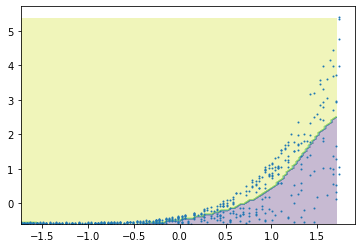

In [5]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
pixels = 100
eixo_x= np.arange(x_min,x_max,(x_max-x_min)/pixels)
eixo_y= np.arange(y_min,y_max,(y_max-y_min)/pixels)
xx,yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]

z = modelo.predict(pontos)
z= z.reshape(xx.shape)

plt.contourf(xx,yy,z,alpha=0.3)
plt.scatter(data_x,data_y,s=1)